In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.5 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


## Milestone 1 (M1) AI-enabled Internet of Things 
### MK IOT DENGAN KEMAMPUAN CERDAS IF-42-GAB01 [ERF]

<b>Muhammad Khiyarus Syiam 1301194242 <br> 
          <b> Muhammad Sulthon Asramanggala 1301194008

In [ ]:
import numpy as np  
# import modul numpy
import pandas as pd 
# import modul pandas 
import matplotlib as mpl
# import modul matplotlib
import matplotlib.pyplot as plt
# import sub-modul pyplot dari matplotlib



In [ ]:
# membaca data set iot_data_sample.xls pada kolom linear accelerometer

df_can = pd.read_excel('acc_sample.xls',
                       sheet_name='Linear Acceleration',
                      #  skipfooter=2
                      )
df_can.head()



,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,0.051317,-5.683024,7.248132,3.775185
1,0.061202,-5.683024,7.248132,3.775185
2,0.071086,-5.683024,7.248132,3.775185
3,0.080971,-5.683024,7.248132,3.775185
4,0.090856,-5.683024,7.248132,3.775185


In [ ]:
df_z_temp = df_can['Linear Acceleration z (m/s^2)']

# print head dari df untuk memastikan data sudah terbaca

df_can.head()



,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,0.051317,-5.683024,7.248132,3.775185
1,0.061202,-5.683024,7.248132,3.775185
2,0.071086,-5.683024,7.248132,3.775185
3,0.080971,-5.683024,7.248132,3.775185
4,0.090856,-5.683024,7.248132,3.775185


# **Soal no 1**

In [ ]:
#  melakukan normalisasi
df_can['Linear Acceleration Linear Acceleration x (m/s^2)'] = df_can['Linear Acceleration x (m/s^2)']-(df_can['Linear Acceleration x (m/s^2)'].sum(axis=0)/len(df_can['Linear Acceleration x (m/s^2)']))
df_can['Linear Acceleration y (m/s^2)'] = df_can['Linear Acceleration y (m/s^2)']-(df_can['Linear Acceleration y (m/s^2)'].sum(axis=0)/len(df_can['Linear Acceleration y (m/s^2)']))
df_can['Linear Acceleration z (m/s^2)'] = df_can['Linear Acceleration z (m/s^2)']-(df_can['Linear Acceleration z (m/s^2)'].sum(axis=0)/len(df_can['Linear Acceleration z (m/s^2)']))




In [ ]:
# ambil dataframe kolom x
df_x = df_can[['Linear Acceleration x (m/s^2)', 'Time (s)']]

# ambil dataframe kolom y
df_y = df_can[['Linear Acceleration y (m/s^2)', 'Time (s)']]

# ambil dataframe kolom z
df_z = df_can[['Linear Acceleration z (m/s^2)', 'Time (s)']]





**Visualisasi**

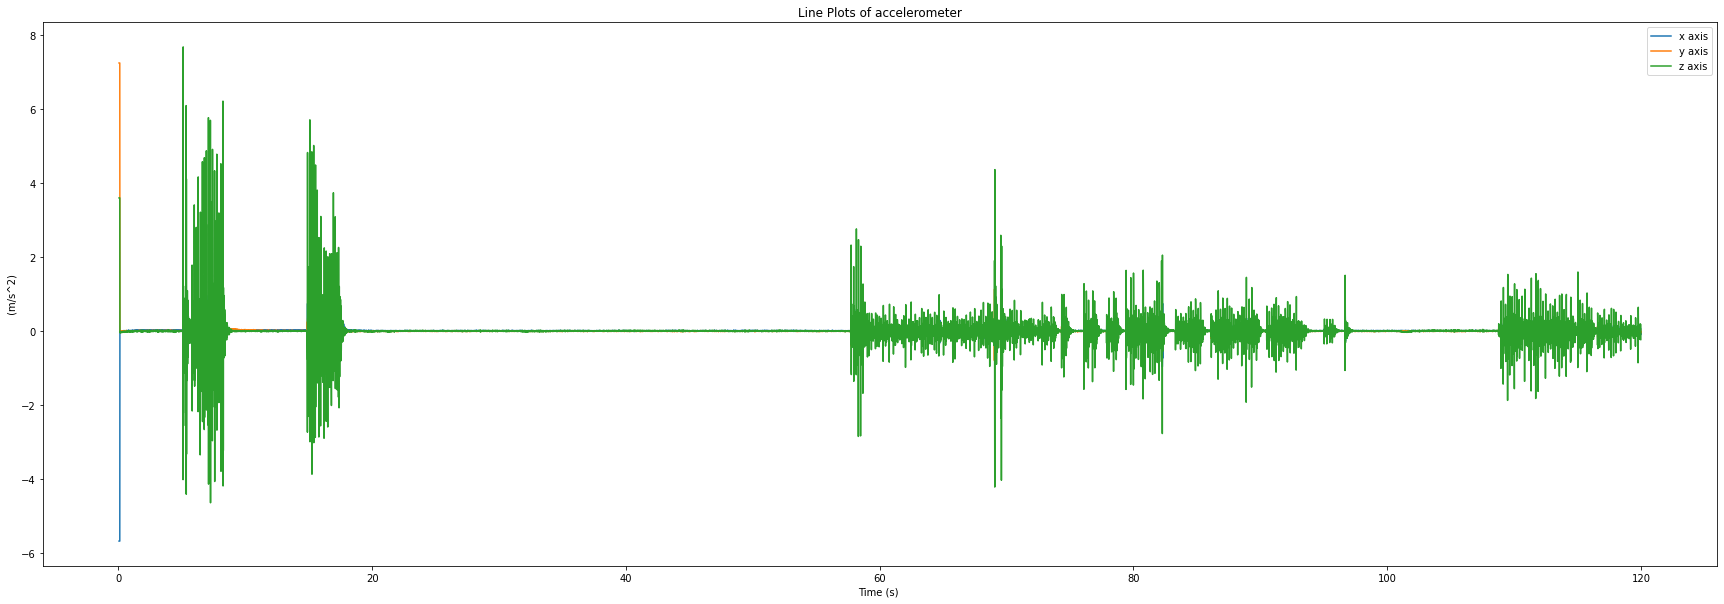

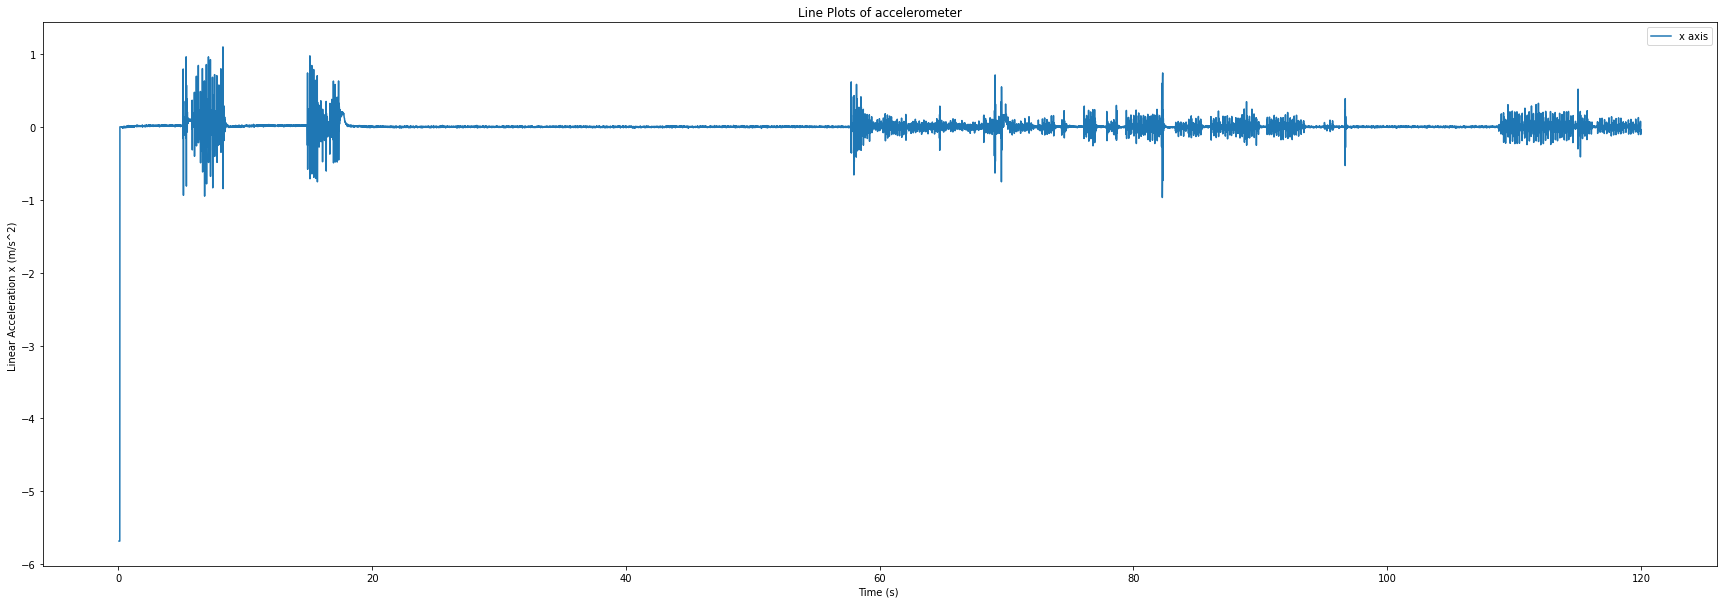

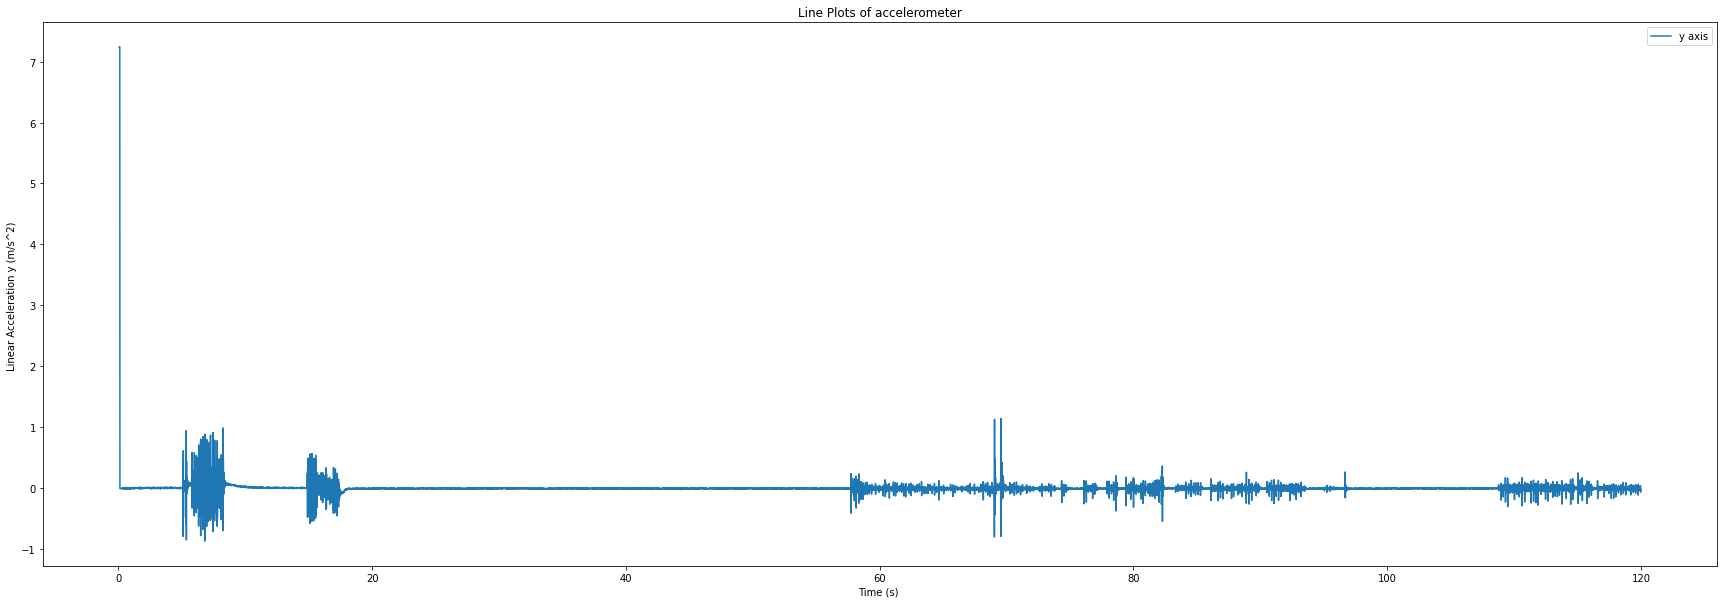

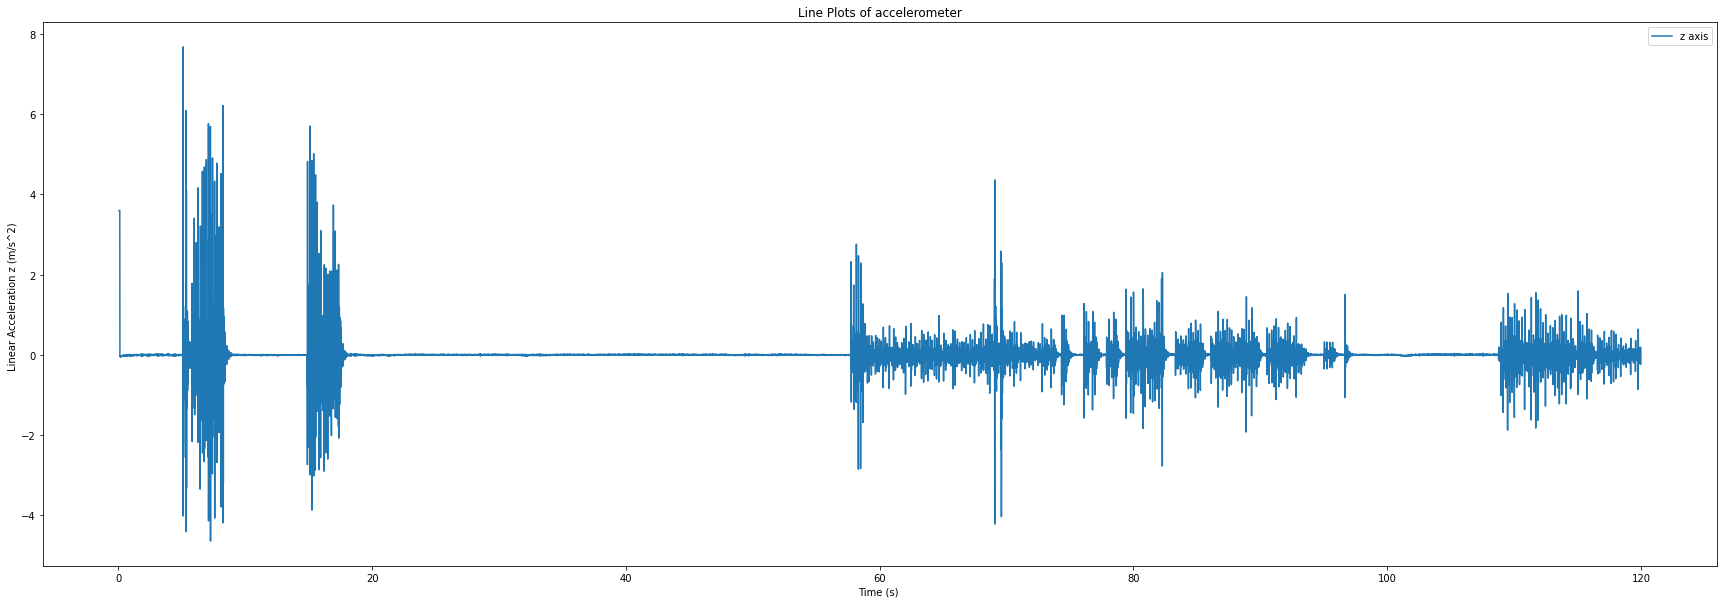

In [ ]:
fig = plt.figure()
# definisi figure

ax0 = fig.add_subplot(1, 1, 1) 
# figure 3 kurva 1 diagram

# # Subplot 2: Line plot
df_x.plot(y='Linear Acceleration x (m/s^2)', x='Time (s)',kind='line', figsize=(30, 10), ax=ax0, label="x axis")
df_y.plot(y='Linear Acceleration y (m/s^2)', x='Time (s)',kind='line', figsize=(30, 10), ax=ax0, label="y axis")
df_z.plot(y='Linear Acceleration z (m/s^2)', x='Time (s)',kind='line', figsize=(30, 10), ax=ax0, label="z axis")
# df_time.set_index('Time (s) ').plot()
ax0.set_title ('Line Plots of accelerometer')
ax0.set_ylabel(' (m/s^2) ')
ax0.set_xlabel('Time (s) ')
# plot 


fig0 = plt.figure() # create figure
fig1 = plt.figure() # create figure
fig2 = plt.figure() # create figure
# 1 kurva 1 diagram

ax0 = fig0.add_subplot(1, 1, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig1.add_subplot(1, 1, 1)
ax2 = fig2.add_subplot(1, 1, 1)# ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# # Subplot 2: Line plot
df_x.plot(y='Linear Acceleration x (m/s^2)', x='Time (s)',kind='line', figsize=(30, 10), ax=ax0, label="x axis")
ax0.set_title ('Line Plots of accelerometer')
ax0.set_ylabel('Linear Acceleration x (m/s^2) ')
ax0.set_xlabel('Time (s) ')

df_y.plot(y='Linear Acceleration y (m/s^2)', x='Time (s)',kind='line', figsize=(30, 10), ax=ax1, label="y axis")
ax1.set_title ('Line Plots of accelerometer')
ax1.set_ylabel('Linear Acceleration y (m/s^2) ')
ax1.set_xlabel('Time (s) ')

df_z.plot(y='Linear Acceleration z (m/s^2)', x='Time (s)',kind='line', figsize=(30, 10), ax=ax2, label="z axis")
ax2.set_title ('Line Plots of accelerometer')
ax2.set_ylabel('Linear Acceleration z (m/s^2) ')
ax2.set_xlabel('Time (s) ')

# plot diagram

plt.show()

*Berdasarkan visualisasi diatas yang paling dominan terdapat pada sumbu z,karena amplitudo tertingginya lebih besar dari sumbu X ataupun Y*


12361.0


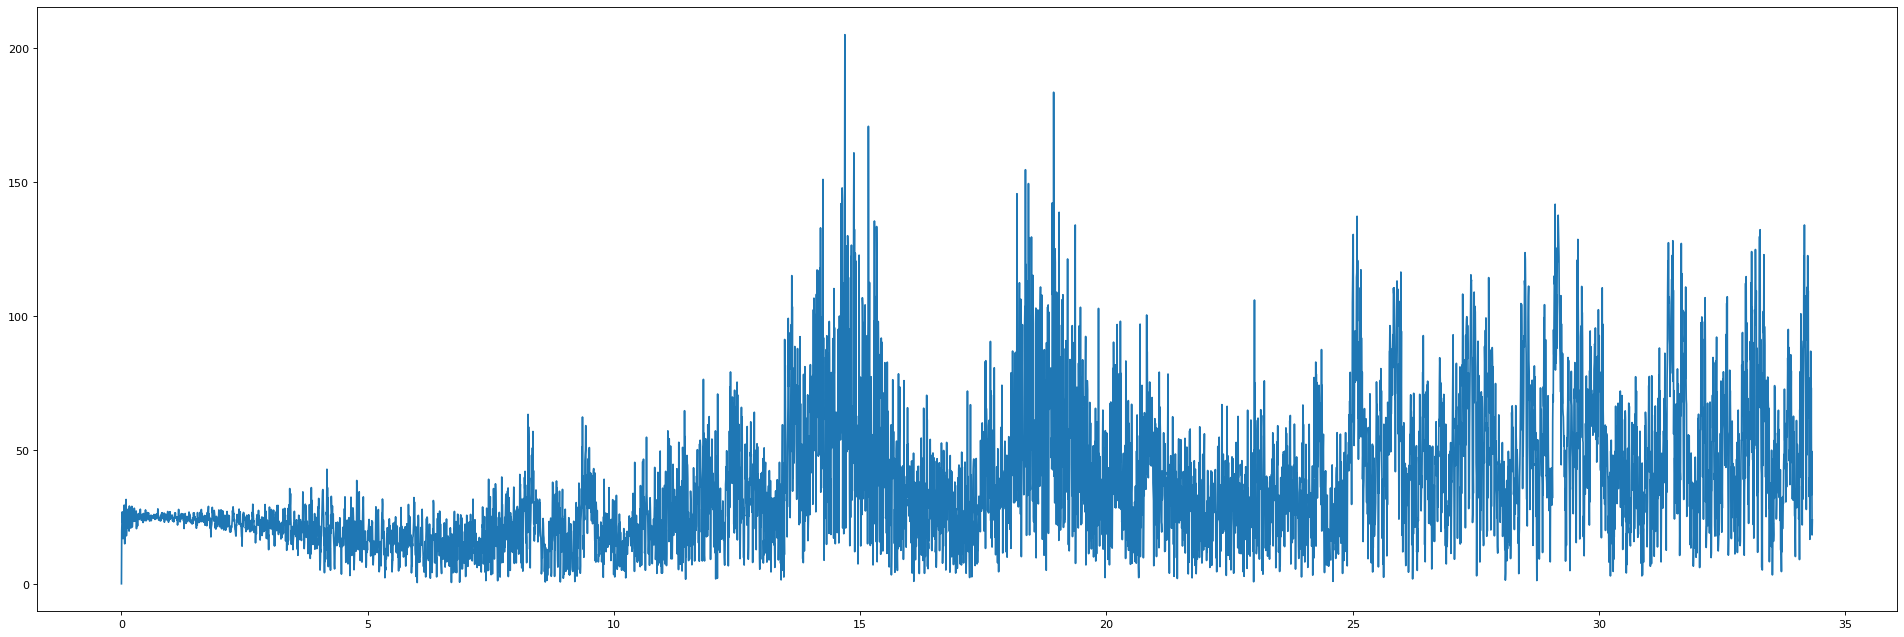

In [26]:
# FFT pada domain dominan(sumbu z)
from scipy.fft import fft, fftfreq, rfft, rfftfreq, irfft 
# import modul untuk fft

# karena durasi pengambilan data adalah 180 s
DURATION = 180

SAMPLE_RATE = len(df_z['Linear Acceleration z (m/s^2)']) / DURATION
# frekuensi sampling diambil dari formula f = n/t

N = SAMPLE_RATE * DURATION
# jumlah sample yang ada

print(N)
# df_z_dominant = df_can['Z (m/s^2)']

#yf = rfftfreq(int(N), 1 / SAMPLE_RATE)
# proses fft sinyal menggunakan fungsi rfft()
#xf = rfft(df_z['Linear Acceleration z (m/s^2)'].values)
# proses mencari frekuensi dari sinyal

yf = rfft(df_z['Linear Acceleration z (m/s^2)'].values)
# proses fft sinyal menggunakan fungsi rfft()
xf = rfftfreq(int(N), 1 / SAMPLE_RATE)
# proses mencari frekuensi dari sinyal

plt.figure(figsize=(30, 10), dpi=80)
plt.plot(xf, np.abs(yf))
plt.show()
# proses menampilkan grafik sinyal hasil fft

# penjelasan mengenai sintax dan algoritma yang dipakai
# rfft()
# adalah syntax untuk melakukan fourir transform pada python menggunakan library scipy. rfft() hanya mengembalikan nilai frekuensi yang lebih dari 0, berbeda dengan fft() yang memiliki titik tengan frekuensi pada sumbu x
# rfft() menerima sebuah parameter, yaitu data frame yang akan di ubah domainnya. terdapat tida buah parameter lainnya yaitu, jumlah titik, sumbu dan jenis normalisasi. 3 parameter ini bersifat opsional
# When the DFT is computed for purely real input, the output is Hermitian-symmetric, i.e. the negative frequency terms are just the complex conjugates of the corresponding positive-frequency terms, and the negative-frequency terms are therefore redundant. This function does not compute the negative frequency terms, and the length of the transformed axis of the output is therefore n//2 + 1.

# When A = rfft(a) and fs is the sampling frequency, A[0] contains the zero-frequency term 0*fs, which is real due to Hermitian symmetry.
# If n is even, A[-1] contains the term representing both positive and negative Nyquist frequency (+fs/2 and -fs/2), and must also be purely real. If n is odd, there is no term at fs/2; A[-1] contains the largest positive frequency (fs/2*(n-1)/n), and is complex in the general case.
# If the input a contains an imaginary part, it is silently discarded.

# Audio Scope


In [ ]:
# membaca data set audio_scope.xls pada kolom Recording

df_can_audio = pd.read_excel('audio_scope.xls',
                       sheet_name='Audio data',
                      #  skipfooter=2
                      )


In [ ]:
df_record_audio = df_can_audio['Recording']

# print head dari df untuk memastikan data sudah terbaca

df_can_audio.head()



,Time (ms),Recording
0,0.000000,0.014252
1,0.020834,0.028809
2,0.041668,0.009339
3,0.062502,-0.040193
4,0.083336,-0.024995


In [ ]:
# ambil dataframe kolom Recording
df_record = df_can_audio[['Recording', 'Time (ms)']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


<Figure size 432x288 with 0 Axes>

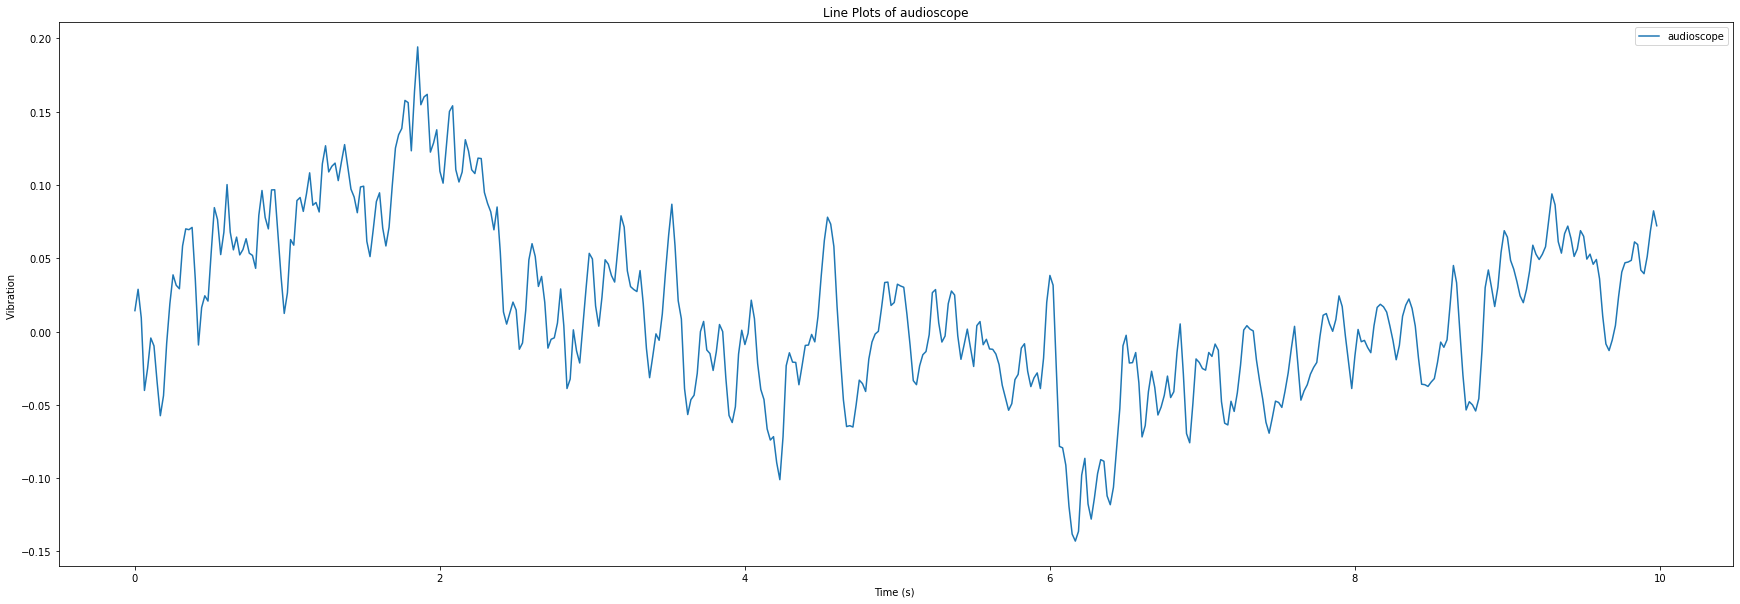

In [ ]:
fig = plt.figure()
# definisi figure

fig0 = plt.figure() # create figure

ax0 = fig0.add_subplot(1, 1, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig1.add_subplot(1, 1, 1)
ax2 = fig2.add_subplot(1, 1, 1)# ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# # Subplot 2: Line plot
df_record.plot(y='Recording', x='Time (ms)',kind='line', figsize=(30, 10), ax=ax0, label="audioscope")
ax0.set_title ('Line Plots of audioscope')
ax0.set_ylabel('Vibration ')
ax0.set_xlabel('Time (s) ')

# plot diagram

plt.show()


# Milestone 2


In [ ]:
# accelerometer

12361.0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


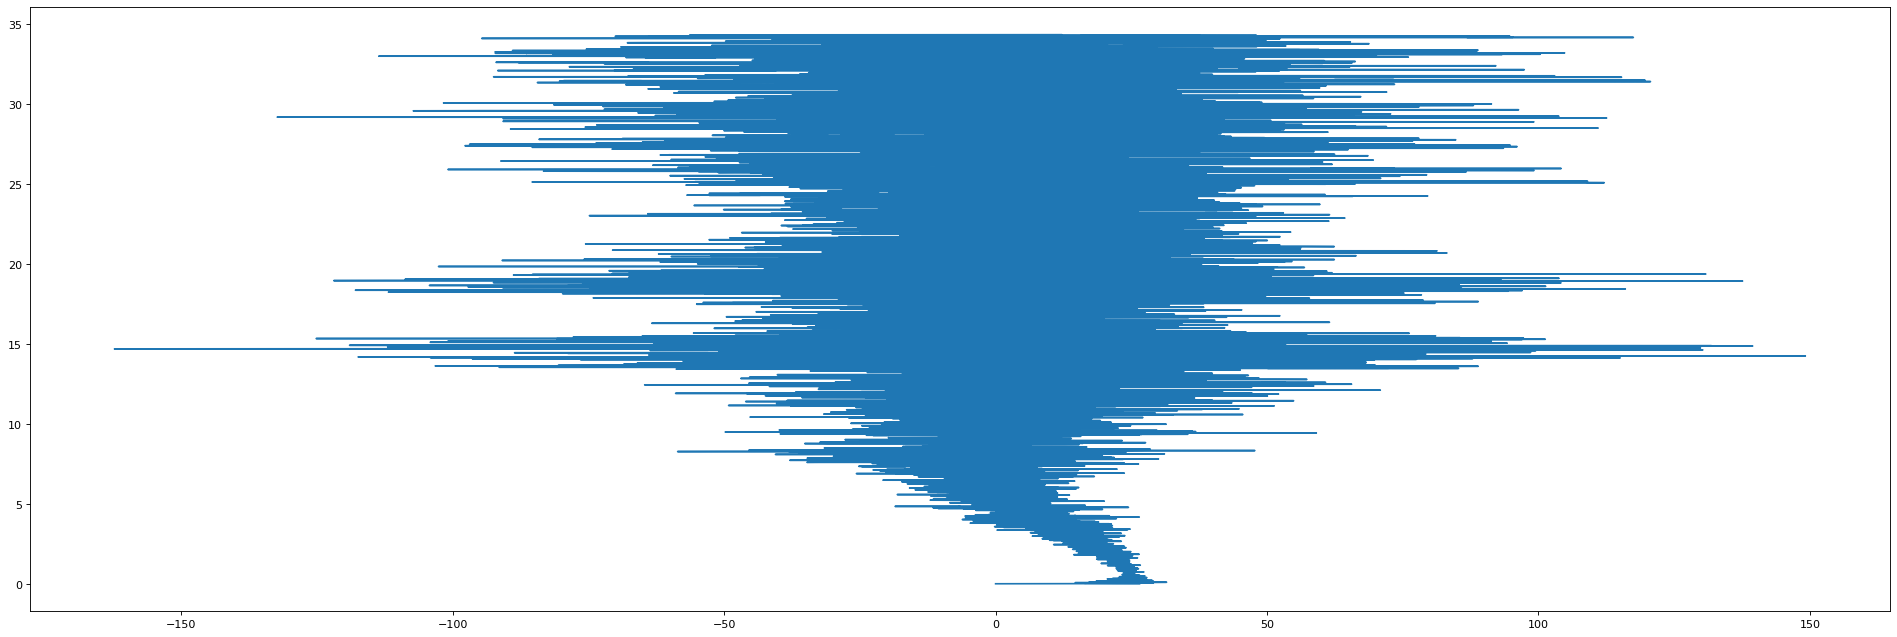

In [ ]:
# FFT pada domain dominan(sumbu z)
from scipy.fft import fft, fftfreq, rfft, rfftfreq, irfft 
# import modul untuk fft

# karena durasi pengambilan data adalah 180 s
DURATION = 180

SAMPLE_RATE = len(df_z['Time (s)']) / DURATION
# frekuensi sampling diambil dari formula f = n/t

N = SAMPLE_RATE * DURATION
# jumlah sample yang ada

print(N)
# df_z_dominant = df_can['Z (m/s^2)']

yf = rfftfreq(int(N), 1 / SAMPLE_RATE)
# proses fft sinyal menggunakan fungsi rfft()
xf = rfft(df_z['Linear Acceleration z (m/s^2)'].values)
# proses mencari frekuensi dari sinyal

#yf = rfft(df_z['Linear Acceleration z (m/s^2)'].values)
# proses fft sinyal menggunakan fungsi rfft()
#xf = rfftfreq(int(N), 1 / SAMPLE_RATE)
# proses mencari frekuensi dari sinyal

plt.figure(figsize=(30, 10), dpi=80)
plt.plot(xf, np.abs(yf))
plt.show()
# proses menampilkan grafik sinyal hasil fft

# penjelasan mengenai sintax dan algoritma yang dipakai
# rfft()
# adalah syntax untuk melakukan fourir transform pada python menggunakan library scipy. rfft() hanya mengembalikan nilai frekuensi yang lebih dari 0, berbeda dengan fft() yang memiliki titik tengan frekuensi pada sumbu x
# rfft() menerima sebuah parameter, yaitu data frame yang akan di ubah domainnya. terdapat tida buah parameter lainnya yaitu, jumlah titik, sumbu dan jenis normalisasi. 3 parameter ini bersifat opsional
# When the DFT is computed for purely real input, the output is Hermitian-symmetric, i.e. the negative frequency terms are just the complex conjugates of the corresponding positive-frequency terms, and the negative-frequency terms are therefore redundant. This function does not compute the negative frequency terms, and the length of the transformed axis of the output is therefore n//2 + 1.

# When A = rfft(a) and fs is the sampling frequency, A[0] contains the zero-frequency term 0*fs, which is real due to Hermitian symmetry.
# If n is even, A[-1] contains the term representing both positive and negative Nyquist frequency (+fs/2 and -fs/2), and must also be purely real. If n is odd, there is no term at fs/2; A[-1] contains the largest positive frequency (fs/2*(n-1)/n), and is complex in the general case.
# If the input a contains an imaginary part, it is silently discarded.

In [ ]:
# audio

480.0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


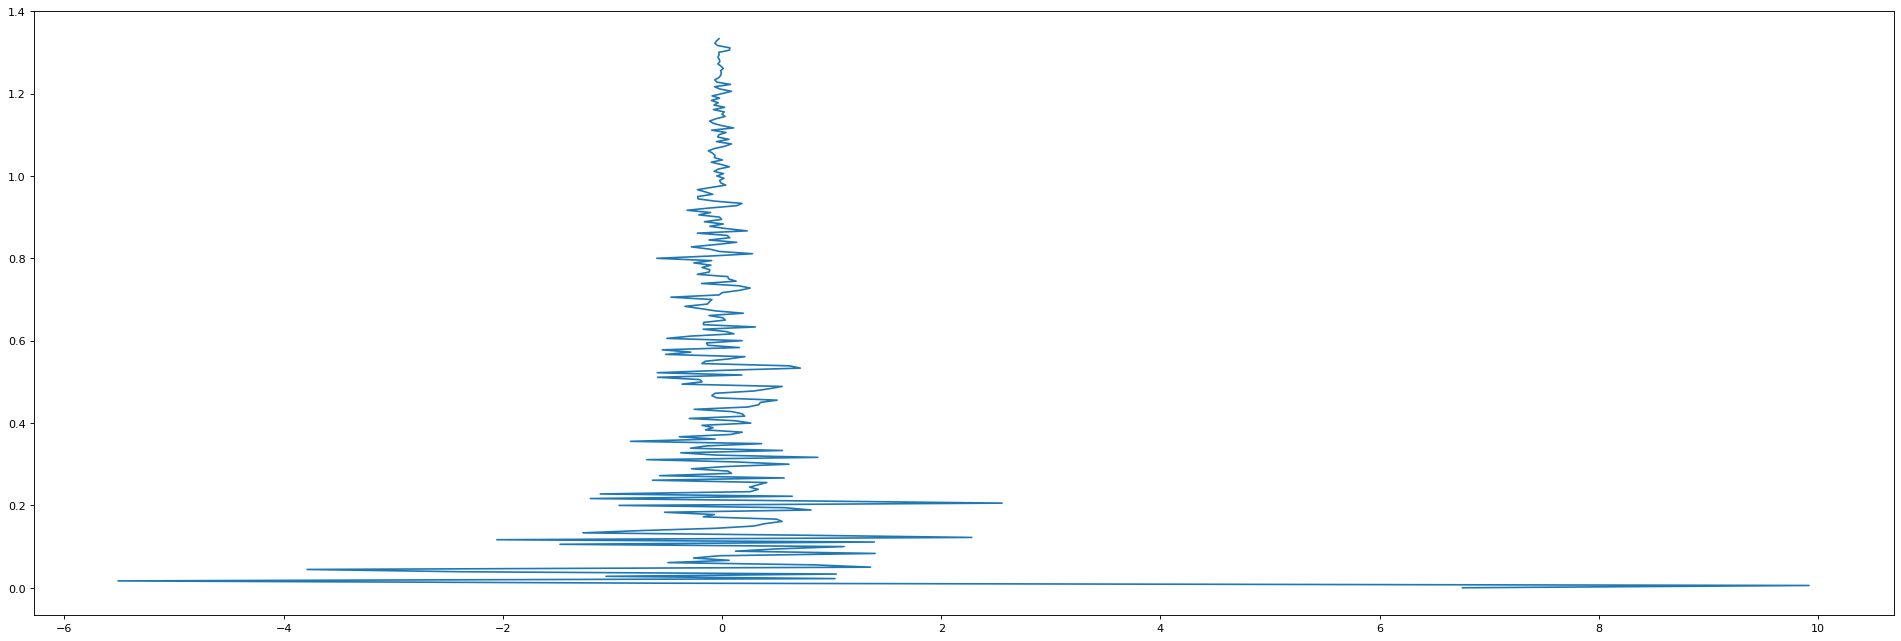

In [ ]:
# FFT pada domain dominan(sumbu z)
from scipy.fft import fft, fftfreq, rfft, rfftfreq, irfft 
# import modul untuk fft

# karena durasi pengambilan data adalah 180 s
DURATION = 180

SAMPLE_RATE = len(df_record['Time (ms)']) / DURATION
# frekuensi sampling diambil dari formula f = n/t

N = SAMPLE_RATE * DURATION
# jumlah sample yang ada

print(N)
# df_z_dominant = df_can['Z (m/s^2)']

yf = rfftfreq(int(N), 1 / SAMPLE_RATE)
# proses fft sinyal menggunakan fungsi rfft()
xf = rfft(df_record['Recording'].values)
# proses mencari frekuensi dari sinyal

#yf = rfft(df_z['Linear Acceleration z (m/s^2)'].values)
# proses fft sinyal menggunakan fungsi rfft()
#xf = rfftfreq(int(N), 1 / SAMPLE_RATE)
# proses mencari frekuensi dari sinyal

plt.figure(figsize=(30, 10), dpi=80)
plt.plot(xf, np.abs(yf))
plt.show()
# proses menampilkan grafik sinyal hasil fft

# penjelasan mengenai sintax dan algoritma yang dipakai
# rfft()
# adalah syntax untuk melakukan fourir transform pada python menggunakan library scipy. rfft() hanya mengembalikan nilai frekuensi yang lebih dari 0, berbeda dengan fft() yang memiliki titik tengan frekuensi pada sumbu x
# rfft() menerima sebuah parameter, yaitu data frame yang akan di ubah domainnya. terdapat tida buah parameter lainnya yaitu, jumlah titik, sumbu dan jenis normalisasi. 3 parameter ini bersifat opsional
# When the DFT is computed for purely real input, the output is Hermitian-symmetric, i.e. the negative frequency terms are just the complex conjugates of the corresponding positive-frequency terms, and the negative-frequency terms are therefore redundant. This function does not compute the negative frequency terms, and the length of the transformed axis of the output is therefore n//2 + 1.

# When A = rfft(a) and fs is the sampling frequency, A[0] contains the zero-frequency term 0*fs, which is real due to Hermitian symmetry.
# If n is even, A[-1] contains the term representing both positive and negative Nyquist frequency (+fs/2 and -fs/2), and must also be purely real. If n is odd, there is no term at fs/2; A[-1] contains the largest positive frequency (fs/2*(n-1)/n), and is complex in the general case.
# If the input a contains an imaginary part, it is silently discarded.